# Project 2 #

In [23]:
import numpy as np
from numpy import linalg as la

In [24]:
data72 = np.loadtxt("72.dat")
data10 = np.loadtxt("10w4.92504.dat")
data1000 = np.loadtxt("1000w5.170166.dat")
data500 = np.loadtxt("500w5.168294156.dat")

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

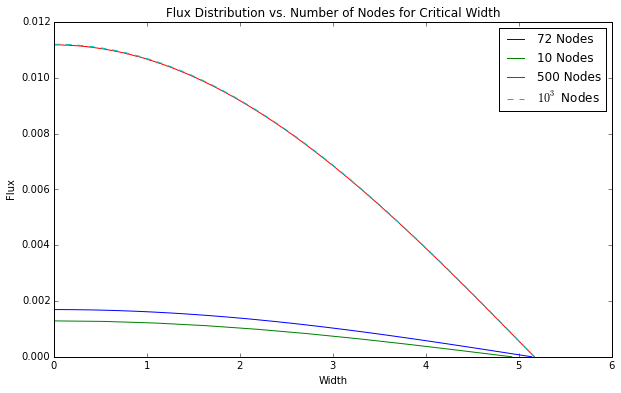

In [26]:
f = plt.figure()
f.set_size_inches(10, 6)
plt.plot(np.linspace(0, 5.1404617072414336, 72), data72, label="72 Nodes")
plt.plot(np.linspace(0, 4.9250459456244462, 10), data10, label="10 Nodes")
plt.plot(np.linspace(0, 5.1682941567744694, 500), data500, label="500 Nodes")
plt.plot(np.linspace(0, 5.1701668365492006, 1000), data1000, '--', label=r'$10^3$ Nodes')
plt.xlabel("Width")
plt.ylabel("Flux")
plt.title("Flux Distribution vs. Number of Nodes for Critical Width")
plt.legend(loc=1)
plt.savefig('flux distribution vs number of nodes.png', format='png', dpi=1000)
plt.show()

In [27]:
def set_matrix(nodes=5, D=9.0, sigma_a=0.15, w=10.):
    n = nodes - 1
    dx = w / n
    offdiag = -D / dx**2
    matrix = np.eye(n) * (sigma_a + 2. * D / dx**2)
    matrix[0][0] = 0.5 * sigma_a + D / dx**2
    for i in range(n)[1:-1]:
        matrix[i][i-1] = offdiag
        matrix[i][i+1] = offdiag
    matrix[0][1] = offdiag
    matrix[n-1][n-2] = offdiag
    
    nusig = 0.157
    S = np.resize(np.array([nusig]), (n))
    S[0] = S[0] * 0.5
    
    return (matrix, S)

In [28]:
nodes = 5

In [29]:
k = 1.

In [30]:
A, S = set_matrix(nodes=nodes, w=5.14)

In [31]:
np.linalg.eigvals(A)**-1 * 0.157

array([ 0.20261459,  0.02815833,  0.01214208,  0.00809371])

In [32]:
np.linalg.eig(A)

(array([  0.77487017,   5.57561406,  12.9302386 ,  19.39776927]),
 array([[ 0.66083566, -0.57467808, -0.42618944, -0.22672427],
        [ 0.57598119,  0.00528394,  0.57899688,  0.5770445 ],
        [ 0.4250936 ,  0.57998615,  0.22656099, -0.65694871],
        [ 0.22547134,  0.5773502 , -0.65711132,  0.428992  ]]))

In [33]:
b = np.resize(np.array([10.]), (nodes-1))
b

array([ 10.,  10.,  10.,  10.])

In [34]:
k_error = 1.0
b_error = 1.0

In [35]:
min_error = 0.001
num_iterations = 0

In [36]:
while k_error > min_error or b_error > min_error:
    b = np.multiply(b, S) * k**-1
    
    b_old = b
    k_old = k
    
    # b = np.dot(np.linalg.inv(A), b) * k
    b = la.solve(A, b * k)
    
    m = np.dot(b, b)**0.5
    m_old = np.dot(b_old, b_old)**0.5
    
    k = m / m_old
    
    k_error = (k - k_old) / k
    
    b_error = np.linalg.norm(b - b_old) / (nodes - 1)
    
    num_iterations += 1

/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in double_scalars
/Users/jrpowers-luhn/miniconda3/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


In [37]:
b

array([  9.57605864e-147,   8.84712458e-147,   6.77129600e-147,
         3.66459899e-147])

In [38]:
b_old

array([  6.71263206e-163,   1.24033267e-162,   9.49309530e-163,
         5.13762615e-163])

In [39]:
k_error

nan

In [40]:
b_error

3.785269540493542e-147

In [41]:
A

array([[  5.52549887,  -5.45049887,   0.        ,   0.        ],
       [ -5.45049887,  11.05099774,  -5.45049887,   0.        ],
       [  0.        ,  -5.45049887,  11.05099774,  -5.45049887],
       [  0.        ,   0.        ,  -5.45049887,  11.05099774]])